# Section for one track 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fastf1

# Chargement des données de session
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Extraction de la trajectoire la plus rapide et des infos du circuit
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()
circuit_info = session.get_circuit_info()

# Fonction pour effectuer la rotation
def rotate(xy, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

In [ ]:
# Obtenir les coordonnées de la trajectoire
track = pos[['X', 'Y']].to_numpy()
track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
rotated_track = rotate(track, angle=track_angle)
track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

# Réduction du nombre de points à 50
n_lignes_souhaitees = 50
pas = len(track_coordinate) / n_lignes_souhaitees
indices = np.unique(np.round(np.arange(0, len(track_coordinate), pas)).astype(int))
df_reduit = track_coordinate.iloc[indices].reset_index(drop=True)

# Charger les données des virages et extraire les informations pour le Grand Prix de Silverstone
df_trun = pd.read_csv('f1_corners_analysis_2023.csv')
df_corners = df_trun[df_trun['Grand Prix'] == 'FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023']

# Associer l'angle du virage au point le plus proche dans df_reduit
for _, row in df_corners.iterrows():
    corner = np.array([[round(row['X']), round(row['Y'])]]).reshape(1, 2)
    corner_rotated = rotate(corner, angle=track_angle).flatten()
    
    distances = np.sqrt((df_reduit['X'] - corner_rotated[0]) ** 2 + (df_reduit['Y'] - corner_rotated[1]) ** 2)
    closest_index = np.argmin(distances)
    df_reduit.loc[closest_index, 'Angle'] = row['Angle']

# Affichage du tracé de la trajectoire avec les zones de virage
plt.figure(figsize=(12, 6))

# Tracé de la trajectoire générale
plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b', label="Trajectoire")

# Tracé des virages avec un style distinct
virages = df_reduit.dropna(subset=['Angle'])
plt.scatter(virages['X'], virages['Y'], color='red', marker='x', s=100, label="Virages")

# Annotation des angles pour chaque virage
for i, row in virages.iterrows():
    plt.annotate(f"{int(row['Angle'])}°", (row['X'], row['Y']), textcoords="offset points", xytext=(5,5), ha='center', color='red')

# Personnalisation du plot
plt.title('Trajectoire du Circuit avec Indication des Virages')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend()
plt.show()

# Section for all track create the base dataset and add angle

In [ ]:
# Charger les circuits de la saison
season_year = 2023
Dataset = pd.DataFrame()
schedule = fastf1.get_event_schedule(2023)

# Boucle sur les numéros de Grand Prix
# for gp_number in range(1, len(schedule)):  # On commence à 1 et on s'arrête avant 23
for gp_number in range(1, 2):  # On commence à 1 et on s'arrête avant 23

    try:
        # Charger les données de la session de qualification pour chaque Grand Prix
        session = fastf1.get_session(season_year, gp_number, 'Q')
        session.load()
        
        lap = session.laps.pick_fastest()
        pos = lap.get_pos_data()
        circuit_info = session.get_circuit_info()
        
        corner_df = circuit_info.corners[['X', 'Y', 'Number']]
        corner_df['Angle'] = None

        # Obtenir les coordonnées de la trajectoire
        track = pos[['X', 'Y']].to_numpy()
        track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
        rotated_track = rotate(track, angle=track_angle)
        track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

        # Réduction du nombre de points à 50
        n_lignes_souhaitees = 50
        pas = len(track_coordinate) / n_lignes_souhaitees
        indices = np.unique(np.round(np.arange(0, len(track_coordinate), pas)).astype(int))
        df_reduit = track_coordinate.iloc[indices].reset_index(drop=True)

        # Charger les données des virages et extraire les informations pour le Grand Prix de Silverstone
        df_trun = pd.read_csv('f1_corners_analysis_2023.csv')
        df_corners = df_trun[df_trun['Grand Prix'] == schedule.loc[i, 'EventName']]

        # Associer l'angle du virage au point le plus proche dans df_reduit
        for _, row in df_corners.iterrows():
            corner = np.array([[round(row['X']), round(row['Y'])]]).reshape(1, 2)
            corner_rotated = rotate(corner, angle=track_angle).flatten() 
            distances = np.sqrt((df_reduit['X'] - corner_rotated[0]) ** 2 + (df_reduit['Y'] - corner_rotated[1]) ** 2)
            closest_index = np.argmin(distances)
            
            df_reduit.loc[closest_index, 'Angle'] = row['Angle']




    except Exception as e:
        print(f"Erreur rencontrée pour le Grand Prix numéro {gp_number}: {e}")
        break  # Arrêter la boucle en cas d'erreur

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


Erreur rencontrée pour le Grand Prix numéro 1: 48


/tmp/ipykernel_19464/1231151576.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_df['Angle'] = None


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

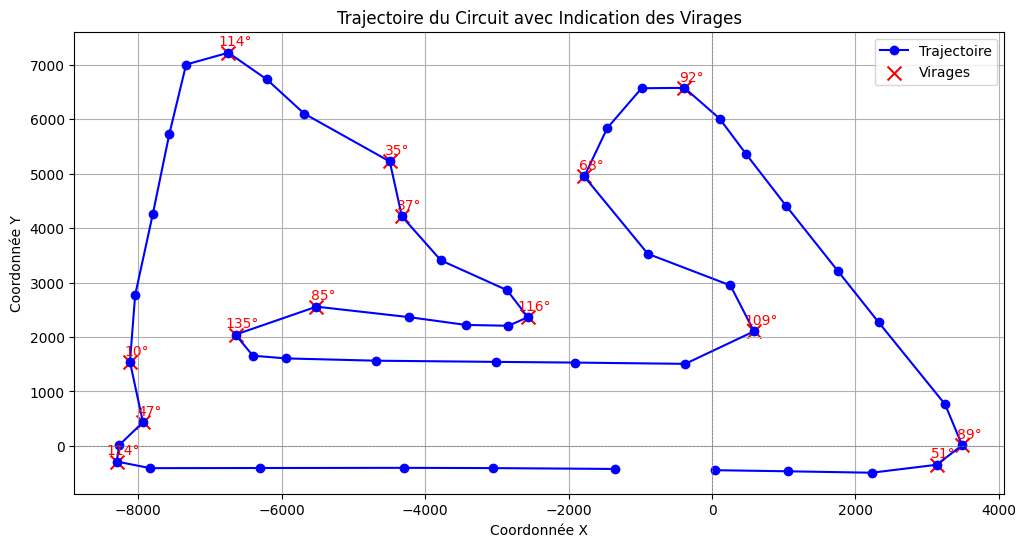

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '14', '63', '55', '18', '31', '44', '81', '10', '27', '24', '20', '77', '1', '22', '23', '21', '4', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        

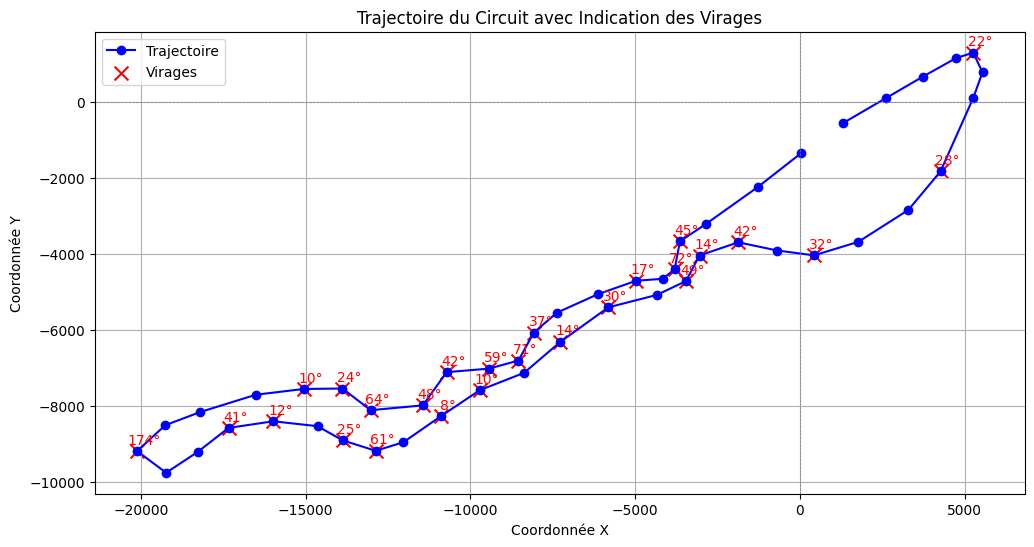

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '44', '14', '55', '18', '16', '23', '10', '27', '31', '22', '4', '20', '21', '81', '24', '2', '77', '11']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WAR

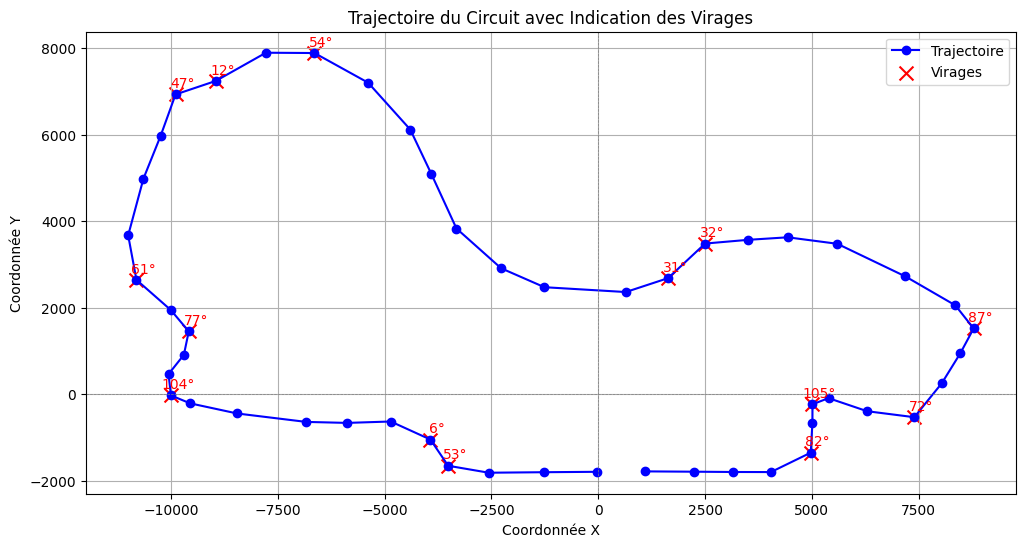

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '55', '44', '14', '4', '22', '18', '81', '63', '31', '23', '77', '2', '24', '27', '20', '10', '21']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

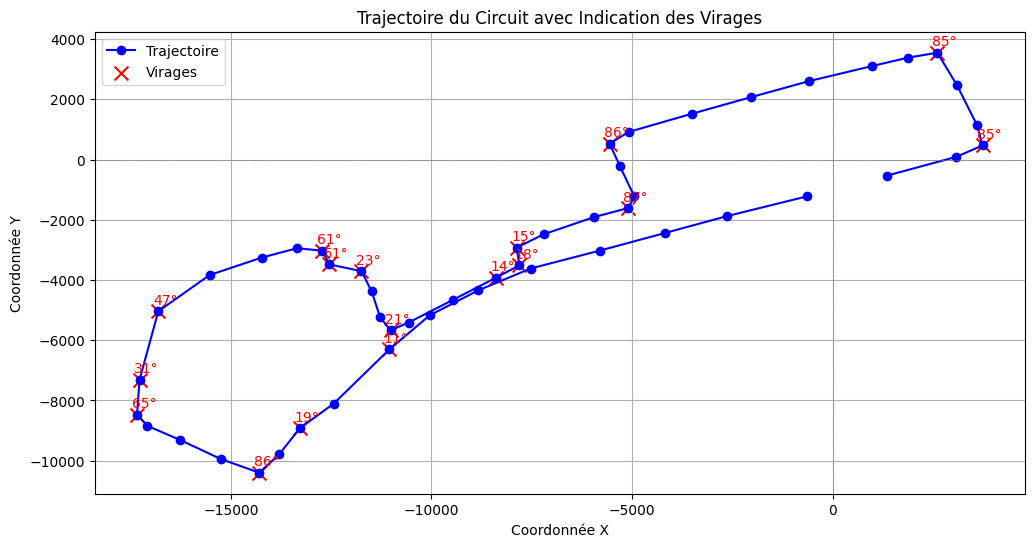

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '14', '55', '20', '10', '63', '16', '31', '1', '77', '23', '27', '44', '24', '21', '4', '22', '18', '81', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 

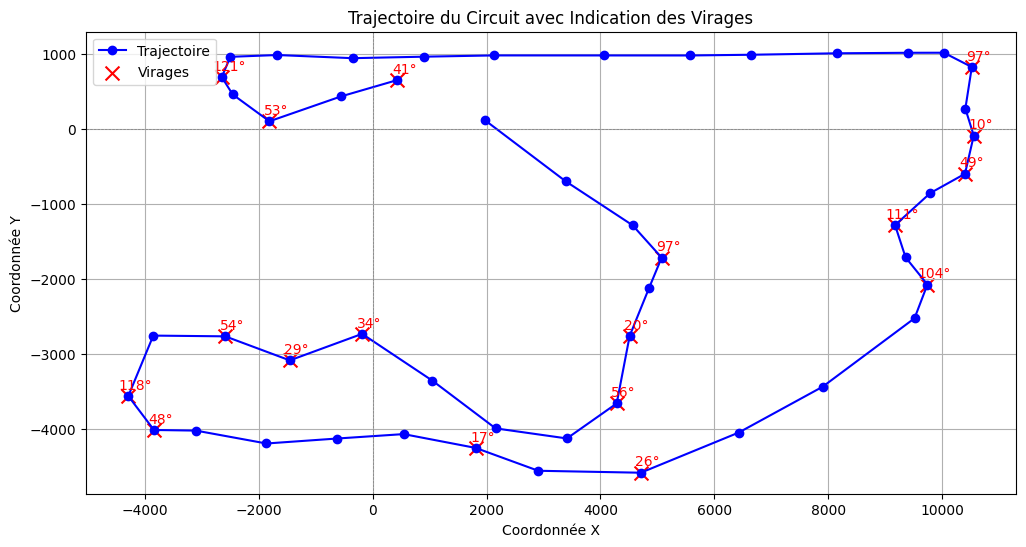

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

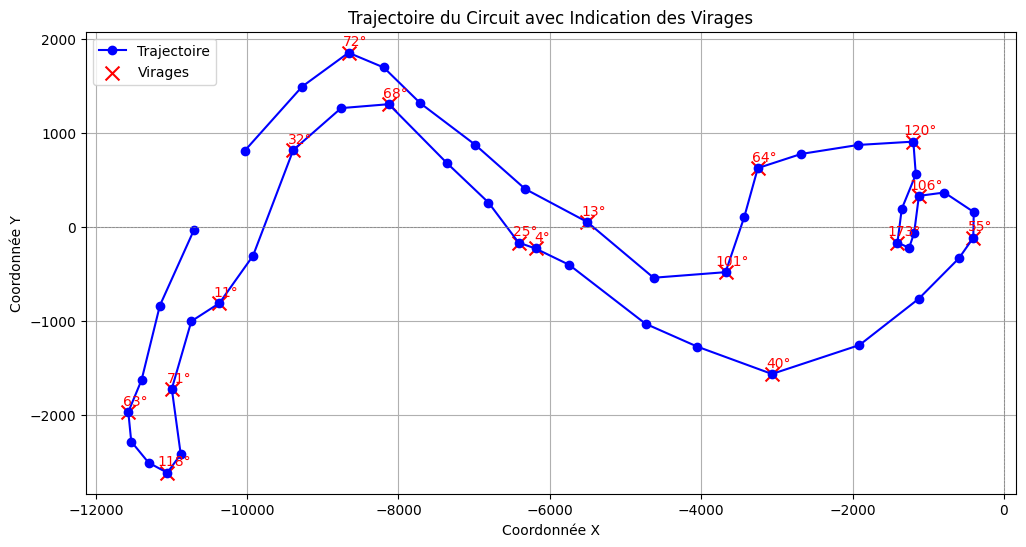

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNIN

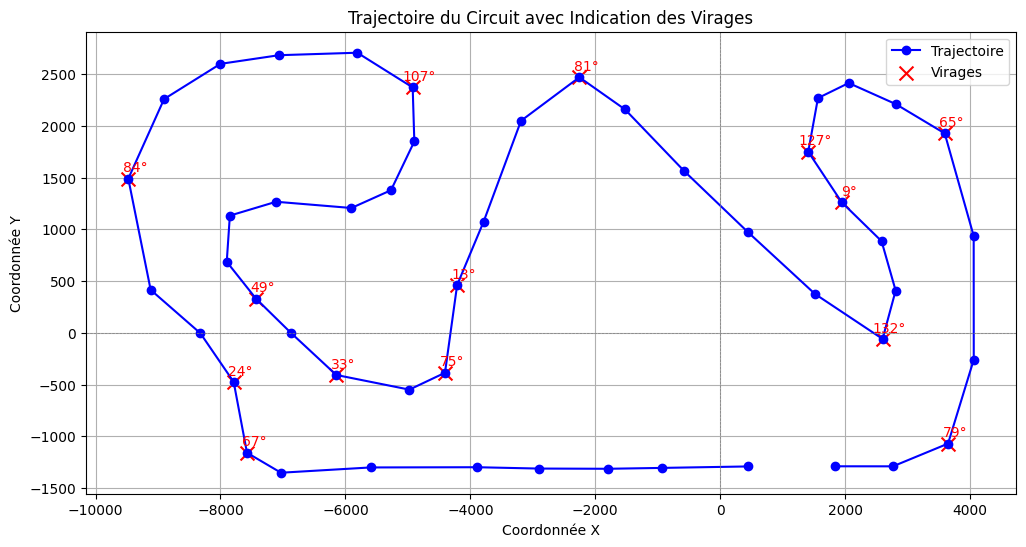

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  1: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 11: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached

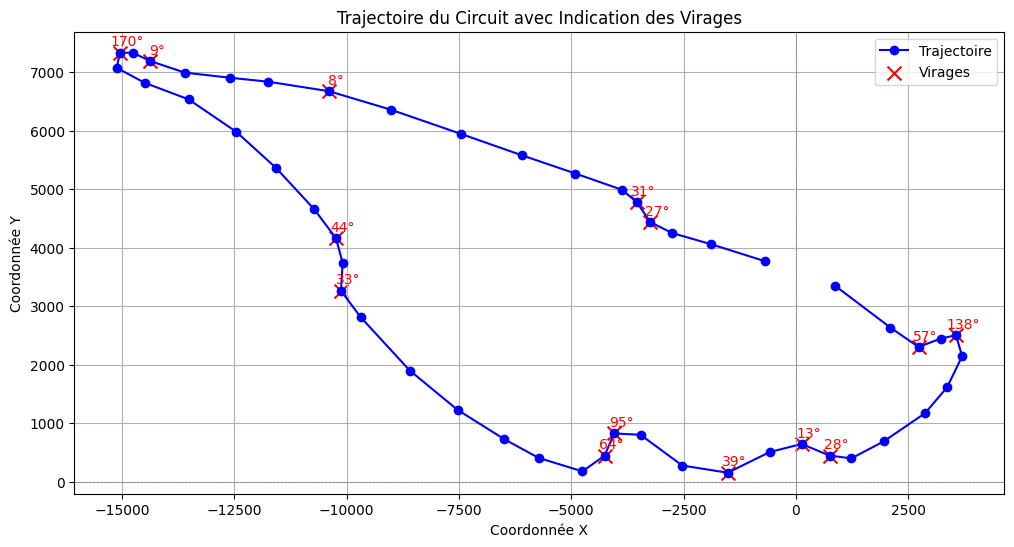

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '4', '44', '18', '14', '27', '10', '23', '63', '31', '81', '77', '11', '22', '24', '2', '20', '21']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

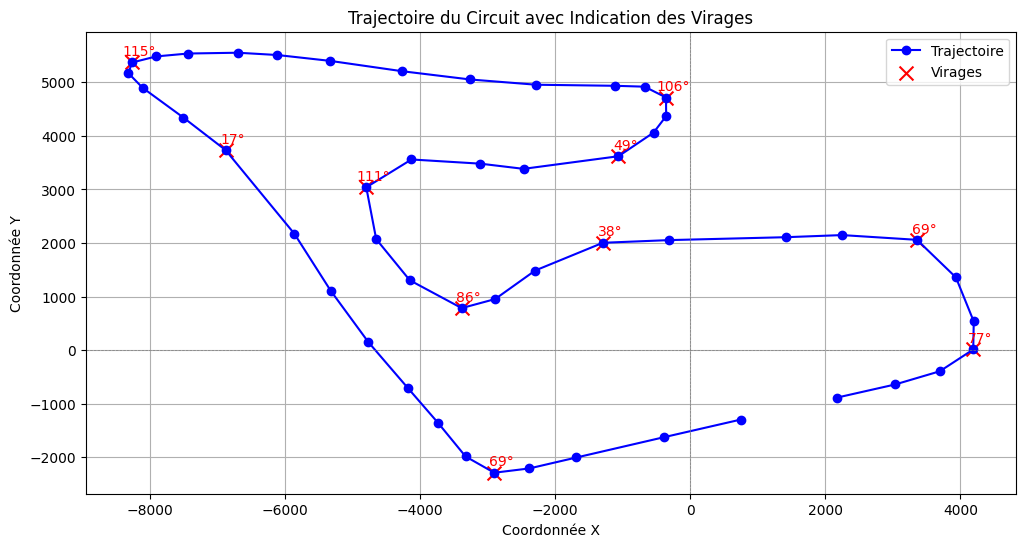

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

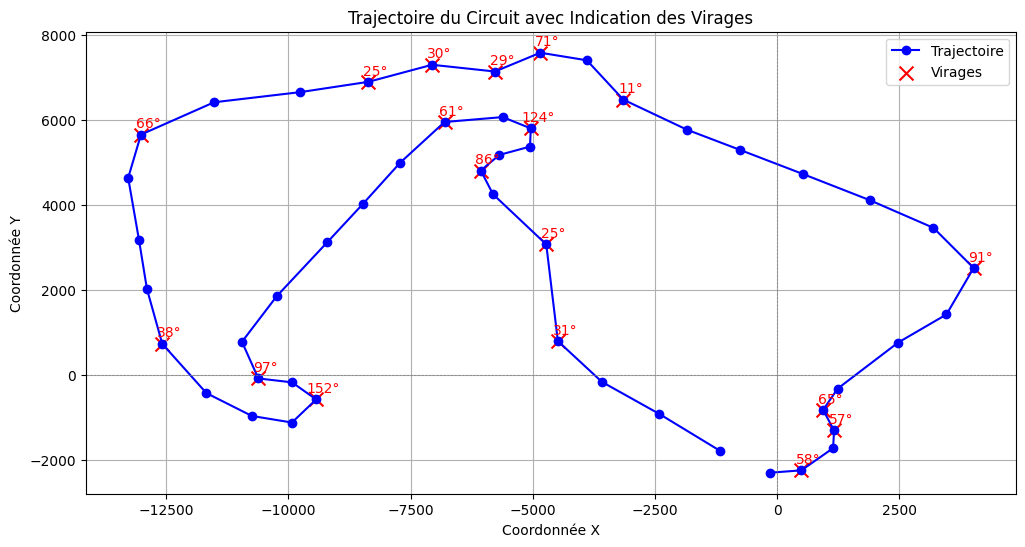

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '24', '16', '77', '14', '11', '27', '55', '31', '3', '18', '10', '23', '22', '63', '20', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNI

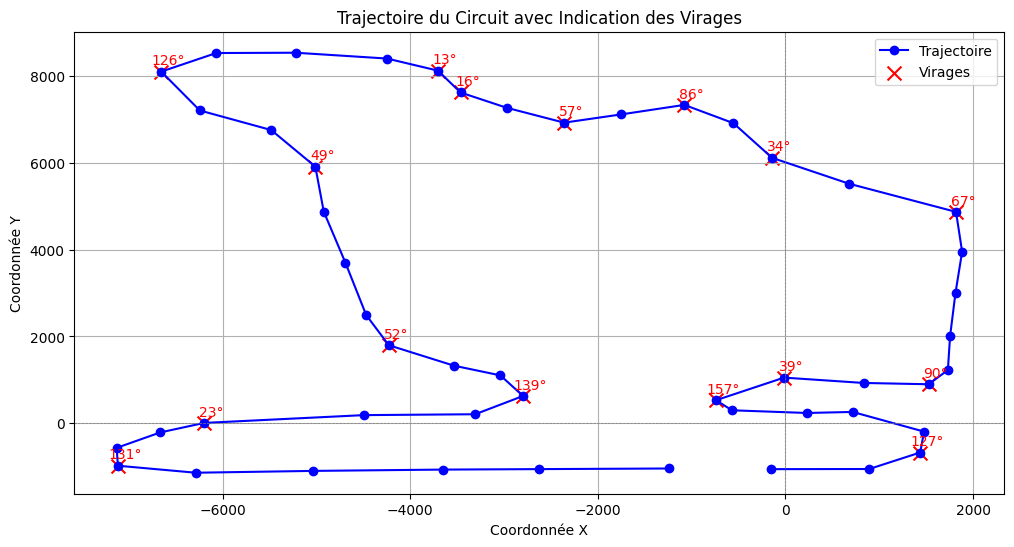

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '55', '81', '4', '63', '14', '18', '22', '10', '20', '77', '31', '23', '24', '2', '3', '27']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING

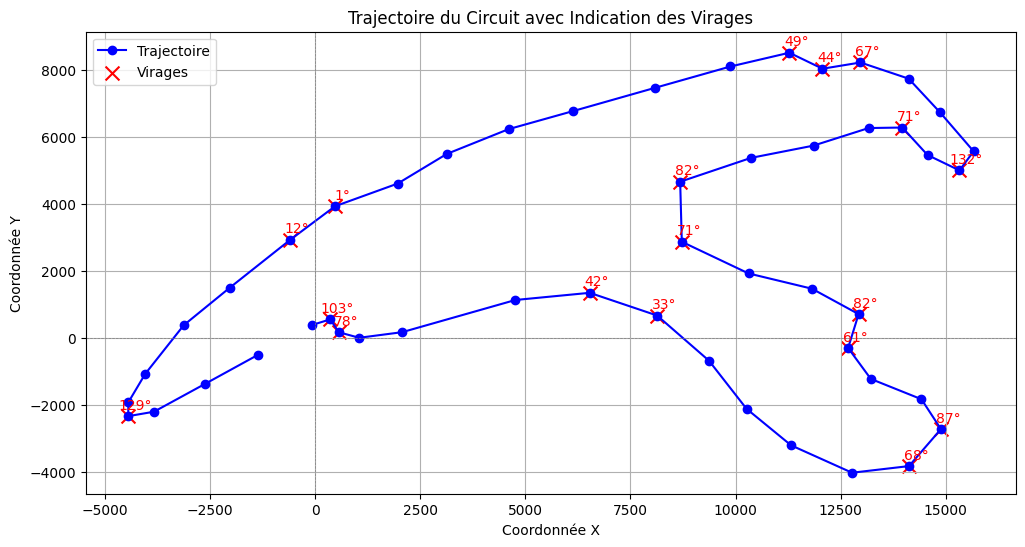

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '23', '14', '55', '11', '81', '16', '2', '18', '10', '44', '22', '27', '24', '31', '20', '77', '40']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

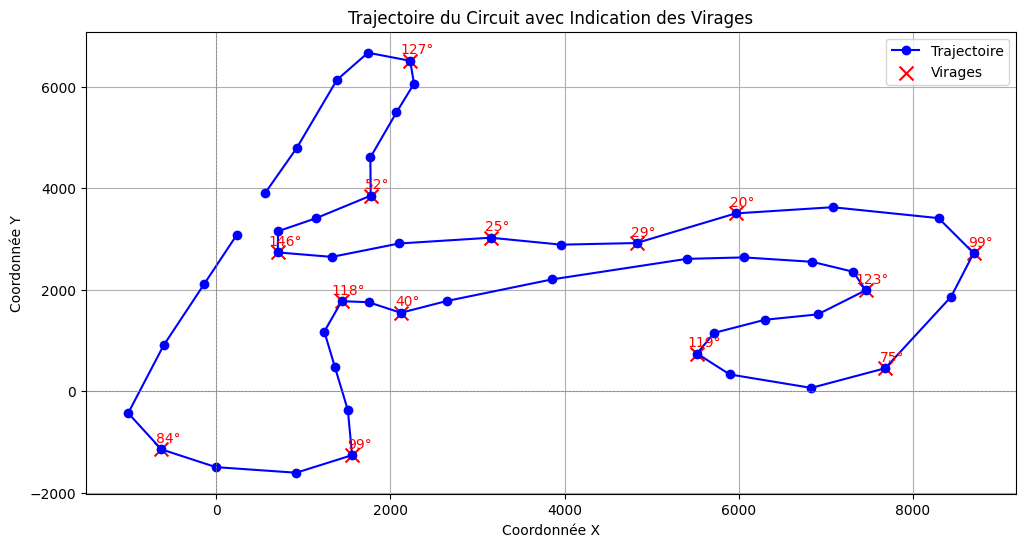

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNIN

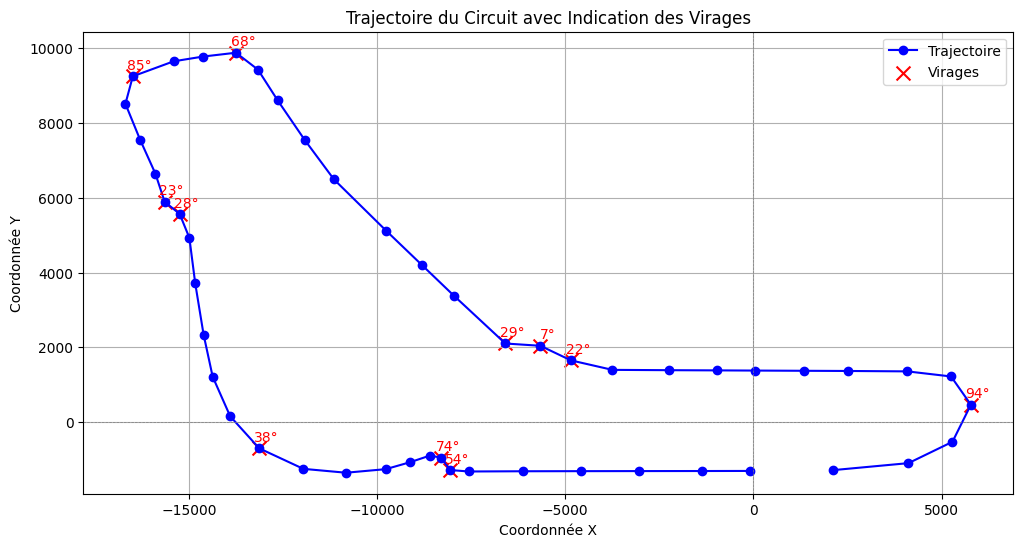

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '63', '16', '4', '44', '20', '14', '31', '27', '40', '1', '10', '11', '23', '22', '77', '81', '2', '24', '18']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

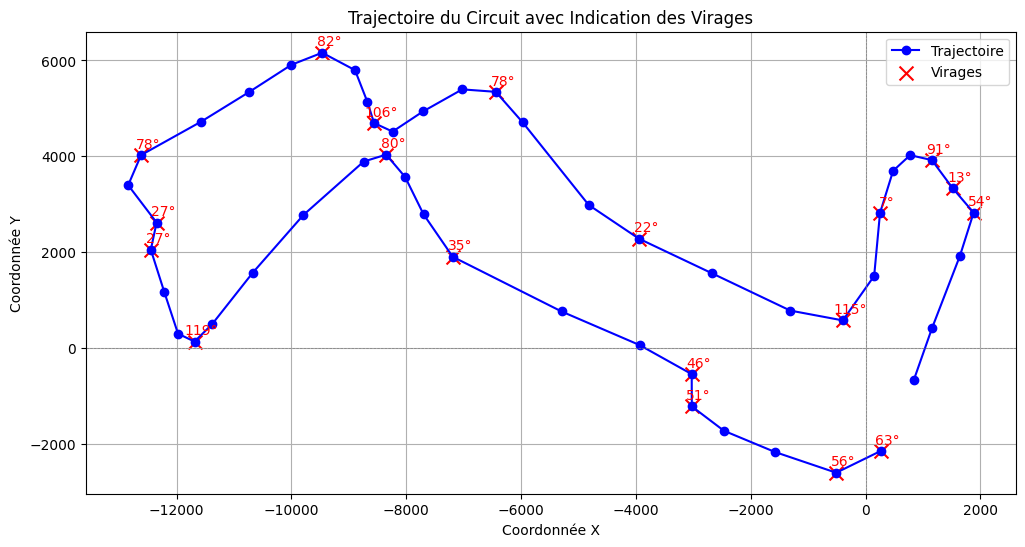

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '11', '55', '44', '63', '22', '14', '40', '10', '23', '31', '20', '77', '18', '27', '24', '2']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

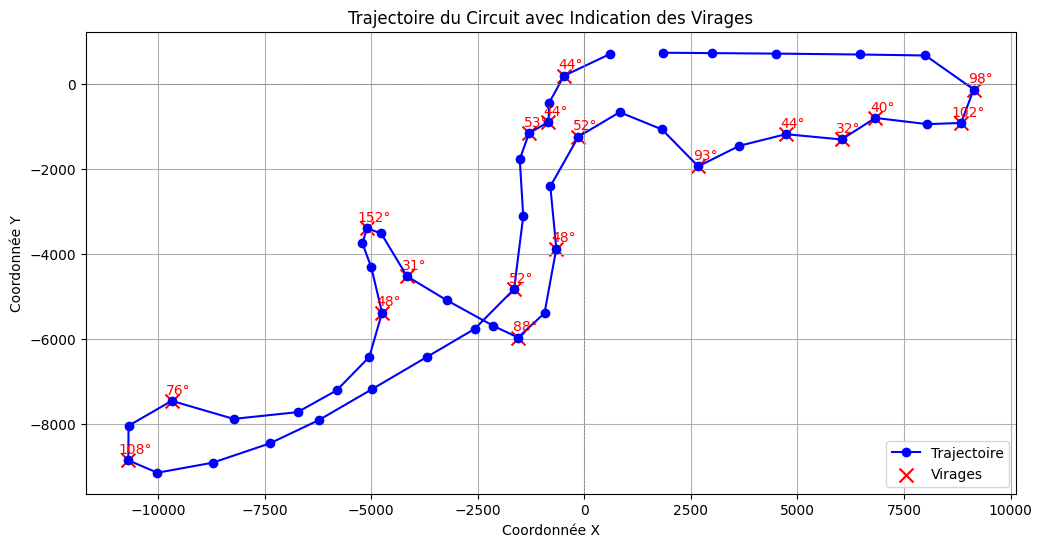

core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '44', '14', '16', '81', '10', '31', '77', '4', '22', '55', '11', '23', '27', '2', '18', '40', '20', '24']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 

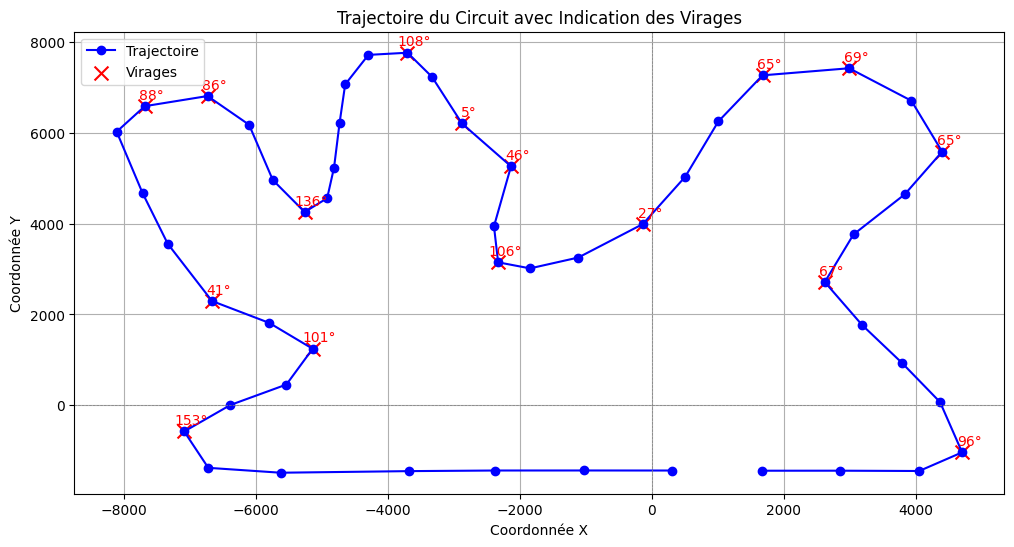

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '4', '44', '55', '63', '1', '10', '31', '11', '81', '22', '24', '77', '20', '3', '27', '14', '23', '18', '2']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy o

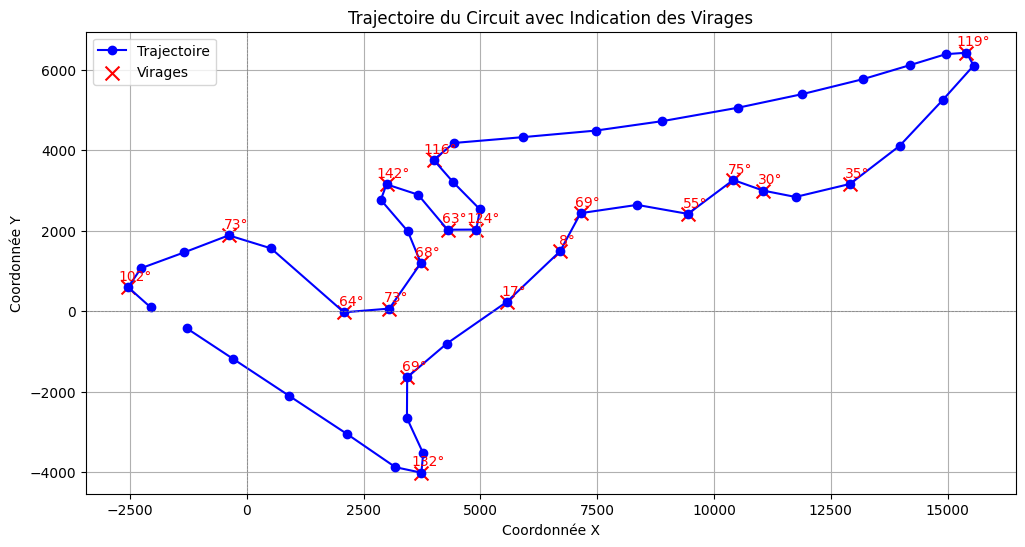

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '3', '11', '44', '81', '63', '77', '24', '10', '27', '14', '23', '22', '31', '20', '18', '4', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WAR

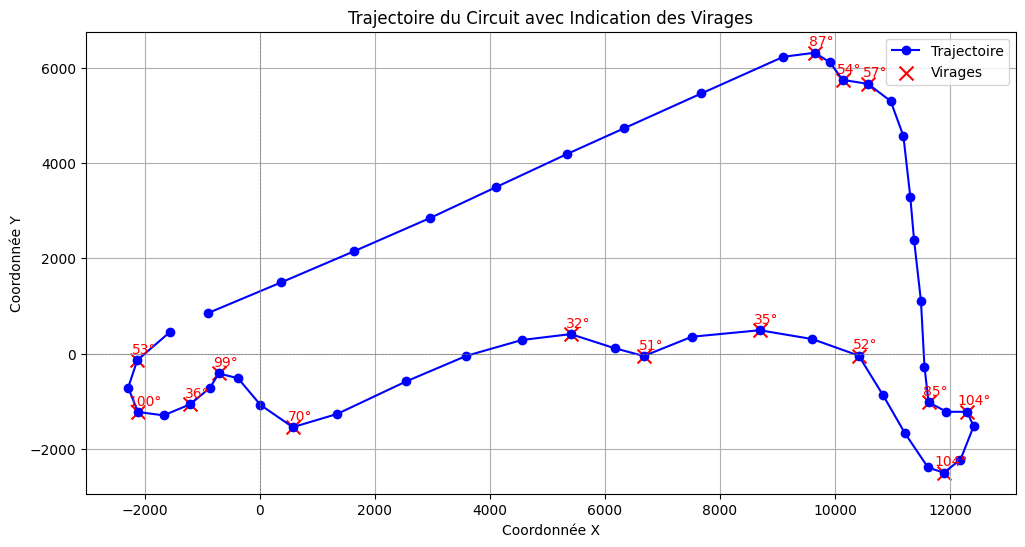

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

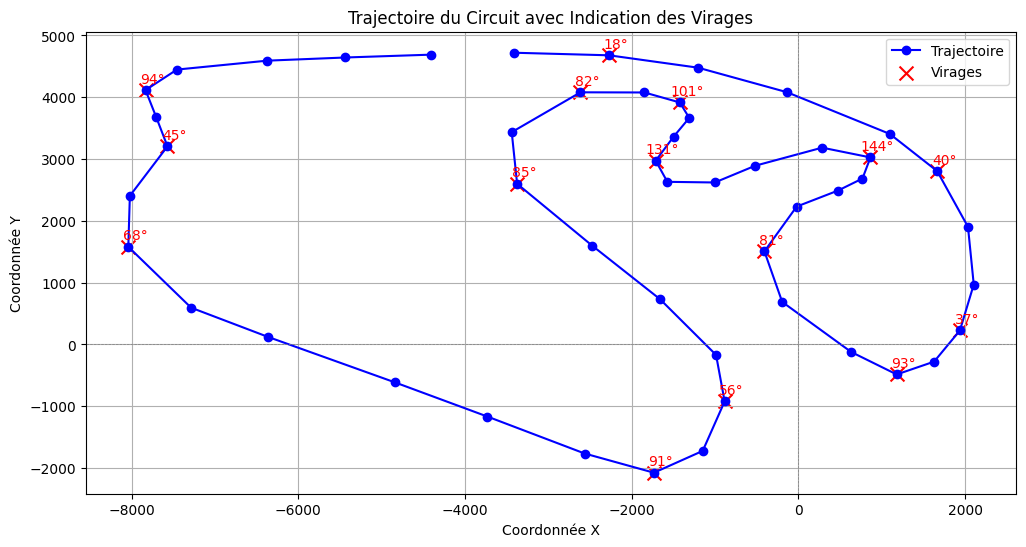

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '63', '10', '23', '2', '77', '20', '14', '44', '11', '27', '18', '3', '4', '31', '24', '81', '22']
/tmp/ipykernel_19464/2242914493.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

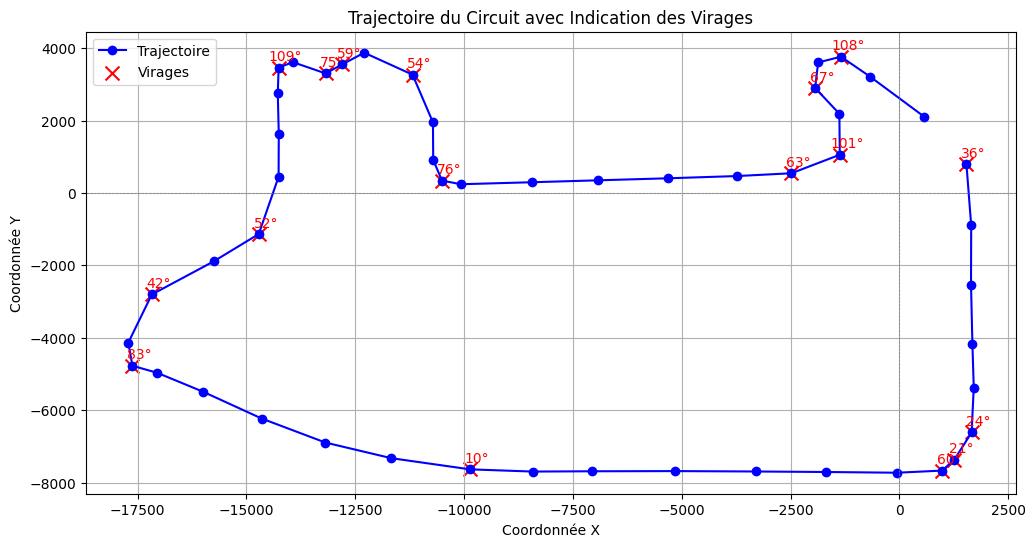

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '4', '22', '14', '27', '11', '10', '44', '31', '18', '23', '3', '55', '20', '77', '24', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNI

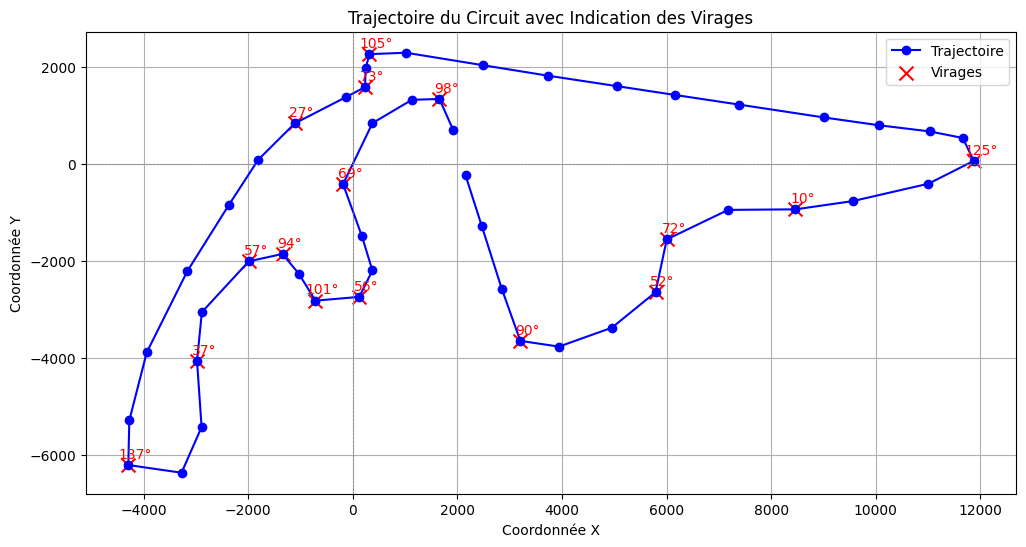

In [169]:
# Charger les circuits de la saison
season_year = 2023
Dataset = pd.DataFrame()
schedule = fastf1.get_event_schedule(2023)

# Boucle sur les numéros de Grand Prix
for gp_number in range(1, len(schedule)):  # On commence à 1 et on s'arrête avant 23
    try:
        # Charger les données de la session de qualification pour chaque Grand Prix
        session = fastf1.get_session(season_year, gp_number, 'Q')
        session.load()
        
        lap = session.laps.pick_fastest()
        pos = lap.get_pos_data()
        circuit_info = session.get_circuit_info()
        
        corner_df = circuit_info.corners[['X', 'Y', 'Number']]
        corner_df['Angle'] = None

        # Obtenir les coordonnées de la trajectoire
        track = pos[['X', 'Y']].to_numpy()
        track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
        rotated_track = rotate(track, angle=track_angle)
        track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

        # Réduction du nombre de points à 50
        n_lignes_souhaitees = 50
        pas = len(track_coordinate) / n_lignes_souhaitees
        indices = np.unique(np.round(np.arange(0, len(track_coordinate), pas)).astype(int))
        df_reduit = track_coordinate.iloc[indices].reset_index(drop=True)

        # Charger les données des virages et extraire les informations pour le Grand Prix de Silverstone
        df_turn = pd.read_csv('f1_corners_analysis_2023.csv')
        df_corners = df_turn[df_turn['Grand Prix'] == schedule.loc[gp_number, 'OfficialEventName']]

        # Associer l'angle du virage au point le plus proche dans df_reduit
        for _, row in df_corners.iterrows():
            corner = np.array([[round(row['X']), round(row['Y'])]]).reshape(1, 2)
            corner_rotated = rotate(corner, angle=track_angle).flatten() 
            distances = np.sqrt((df_reduit['X'] - corner_rotated[0]) ** 2 + (df_reduit['Y'] - corner_rotated[1]) ** 2)
            closest_index = np.argmin(distances)
            df_reduit.loc[closest_index, 'Angle'] = row['Angle']

        # Ajouter une colonne pour identifier le Grand Prix et stocker dans Dataset
        df_reduit['Grand Prix'] = schedule.loc[gp_number, 'EventName']
        Dataset = pd.concat([Dataset, df_reduit], ignore_index=True)

        # Affichage du tracé de la trajectoire avec les zones de virage
        plt.figure(figsize=(12, 6))

        # Tracé de la trajectoire générale
        plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b', label="Trajectoire")

        # Tracé des virages avec un style distinct
        virages = df_reduit.dropna(subset=['Angle'])
        plt.scatter(virages['X'], virages['Y'], color='red', marker='x', s=100, label="Virages")

        # Annotation des angles pour chaque virage
        for i, row in virages.iterrows():
            plt.annotate(f"{int(row['Angle'])}°", (row['X'], row['Y']), textcoords="offset points", xytext=(5,5), ha='center', color='red')

        # Personnalisation du plot
        plt.title('Trajectoire du Circuit avec Indication des Virages')
        plt.xlabel('Coordonnée X')
        plt.ylabel('Coordonnée Y')
        plt.grid()
        plt.axhline(0, color='grey', lw=0.5, ls='--')
        plt.axvline(0, color='grey', lw=0.5, ls='--')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Erreur rencontrée pour le Grand Prix numéro {gp_number}: {e}")
        break  # Arrêter la boucle en cas d'erreur

# Add strait lines to sections

In [ ]:
import numpy as np
import fastf1
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d
import pandas as pd

# Fonction pour fusionner les sections droites trop proches les unes des autres
def merge_close_straights(straight_coords, threshold=10):
    merged_straights = []
    current_start = straight_coords[0][:2]  # (x_start, y_start) of the first section
    current_end = straight_coords[0][2:]    # (x_end, y_end) of the first section

    for i in range(1, len(straight_coords)):
        next_start = straight_coords[i][:2]
        distance = np.sqrt((next_start[0] - current_end[0]) ** 2 + (next_start[1] - current_end[1]) ** 2)
        
        if distance < threshold:
            # Extend the current straight section
            current_end = straight_coords[i][2:]  # Update end to the end of the current section
        else:
            # Save the current straight section and start a new one
            merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
            current_start = next_start
            current_end = straight_coords[i][2:]
    
    # Add the last section
    merged_straights.append((current_start[0], current_start[1], current_end[0], current_end[1]))
    return merged_straights

# Fonction principale pour calculer et fusionner les sections droites
def calculate_and_merge_straights(gp_name, session_type='Q', angle_threshold=1, merge_threshold=1000, show_plot=False):
    # Charger les données de la piste
    session = fastf1.get_session(2023, gp_name, session_type)
    session.load()
    lap = session.laps.pick_fastest()
    pos = lap.get_pos_data()
    
    # Obtenir les coordonnées X et Y
    x = pos['X'].to_numpy()
    y = pos['Y'].to_numpy()
    
    # Définir les distances pour interpolation
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2).cumsum()
    distances = np.insert(distances, 0, 0)

    # Interpolation uniforme
    uniform_distances = np.linspace(0, distances[-1], 500)
    interp_x = interp1d(distances, x, kind='linear')
    interp_y = interp1d(distances, y, kind='linear')
    uniform_x = interp_x(uniform_distances)
    uniform_y = interp_y(uniform_distances)
    
    # Calcul des angles entre segments
    angles = []
    for i in range(len(uniform_x) - 2):
        v1 = np.array([uniform_x[i+1] - uniform_x[i], uniform_y[i+1] - uniform_y[i]])
        v2 = np.array([uniform_x[i+2] - uniform_x[i+1], uniform_y[i+2] - uniform_y[i+1]])
        angle = np.arctan2(v2[1], v2[0]) - np.arctan2(v1[1], v1[0])
        angle = np.degrees(angle)
        angles.append((angle + 180) % 360 - 180)
    
    # Lissage des angles
    abs_angles = np.abs(angles)
    smoothed_angles = uniform_filter1d(abs_angles, size=5)
    
    # Identifier les sections droites
    straight_sections = []
    start_idx = None
    for i in range(len(smoothed_angles)):
        if smoothed_angles[i] < angle_threshold:
            if start_idx is None:
                start_idx = i
        else:
            if start_idx is not None:
                straight_sections.append((start_idx, i))
                start_idx = None
    if start_idx is not None:
        straight_sections.append((start_idx, len(smoothed_angles)))

    # Stocker les coordonnées des sections droites
    straight_coordinates = [
        (uniform_x[start_idx], uniform_y[start_idx], uniform_x[end_idx - 1], uniform_y[end_idx - 1])
        for start_idx, end_idx in straight_sections
    ]
    
    # Fusionner les sections droites trop proches
    merged_straight_coordinates = merge_close_straights(straight_coordinates, threshold=merge_threshold)

    # Calculer la longueur de chaque section droite et les stocker dans un DataFrame
    straight_lines = []
    for (x_start, y_start, x_end, y_end) in merged_straight_coordinates:
        length = np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
        straight_lines.append((x_start, y_start, x_end, y_end, length))
    
    df_straights = pd.DataFrame(straight_lines, columns=['Start_X', 'Start_Y', 'End_X', 'End_Y', 'Length'])

    # Affichage du graphique si demandé
    if show_plot:
        plt.figure(figsize=(10, 6))
        plt.plot(uniform_x, uniform_y, color='black', linewidth=2, label='Trajectoire complète')

        # Mettre en évidence les sections droites fusionnées
        for (x_start, y_start, x_end, y_end) in merged_straight_coordinates:
            plt.plot([x_start, x_end], [y_start, y_end], color='red', linewidth=2, linestyle='-')
        
        plt.title(f'Trajectoire avec Sections Droites Fusionnées - {gp_name}')
        plt.xlabel('Position X')
        plt.ylabel('Position Y')
        plt.axis('equal')
        plt.grid()
        plt.legend()
        plt.show()

    # Afficher les données des sections droites fusionnées
    # print(df_straights)
    
    return df_straights


/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

def calculate_straight_sections(df_50_sections, grand_prix_name, year=2023, session_type='Q', ignore_angles=True, plot=False):
    """
    Calcule et assigne les sections droites au DataFrame des sections du circuit.

    Paramètres:
    - df_50_sections (pd.DataFrame) : DataFrame contenant les informations sur les sections du circuit.
      Ce DataFrame doit inclure les colonnes suivantes :
        - 'X' : Coordonnée X de la section.
        - 'Y' : Coordonnée Y de la section.
        - 'Angle' : Indicateur de la présence d'un virage (NaN pour les sections droites, une valeur si un angle est présent).
        - 'Grand Prix' : Nom du Grand Prix, utilisé pour filtrer les sections du circuit spécifique.
        Note : Si d'autres colonnes sont présentes, elles ne seront pas utilisées par cette fonction.
        
    - grand_prix_name (str) : Nom du Grand Prix (par ex. "Saudi Arabian Grand Prix")
    - year (int) : Année de la course (par défaut 2023)
    - session_type (str) : Type de session (par ex. 'Q' pour Qualification)
    - ignore_angles (bool) : Si True, n'assigne pas les sections droites aux lignes avec un angle
    - plot (bool) : Si True, affiche un graphique de la trajectoire et des sections droites

    Retour:
    - pd.DataFrame : Le DataFrame df_50_sections mis à jour avec les sections droites assignées
    """
    # Charger les données de la session pour obtenir l'angle de rotation du circuit
    session = fastf1.get_session(year, grand_prix_name, session_type)
    session.load()
    track_angle = session.get_circuit_info().rotation * np.pi / 180

    # Calculer et charger les sections droites
    df_straights = calculate_and_merge_straights(
        gp_name=grand_prix_name,
        session_type='Q',
        angle_threshold=1,
        merge_threshold=500,
        show_plot=False  # Active l'affichage du graphique
        )

    # Fonction de rotation
    def rotate(coords, angle):
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        return np.dot(coords, rotation_matrix.T)

    # Appliquer la rotation aux coordonnées des sections droites
    for i, row in df_straights.iterrows():
        start_coords = rotate(np.array([[row['Start_X'], row['Start_Y']]]), track_angle)
        end_coords = rotate(np.array([[row['End_X'], row['End_Y']]]), track_angle)
        df_straights.at[i, 'Start_X'] = start_coords[0, 0]
        df_straights.at[i, 'Start_Y'] = start_coords[0, 1]
        df_straights.at[i, 'End_X'] = end_coords[0, 0]
        df_straights.at[i, 'End_Y'] = end_coords[0, 1]

    # Filtrer le DataFrame des sections pour le Grand Prix en question
    df_50_sections = df_50_sections[df_50_sections['Grand Prix'] == grand_prix_name].copy()
    df_50_sections['Straight_Line'] = None

    # Assigner les sections droites à df_50_sections
    for i in range(len(df_straights)):
        row = df_straights.loc[i]
        x_start, y_start = row['Start_X'], row['Start_Y']
        x_end, y_end = row['End_X'], row['End_Y']
        straight_length = row['Length']

        distances_start = np.sqrt((df_50_sections['X'] - x_start) ** 2 + (df_50_sections['Y'] - y_start) ** 2)
        closest_start = distances_start.idxmin()

        distances_end = np.sqrt((df_50_sections['X'] - df_50_sections['X'][closest_start]) ** 2 + 
                                (df_50_sections['Y'] - df_50_sections['Y'][closest_start]) ** 2)

        # Calculer les indices de début et de fin en fonction de l'offset initial
        start_idx = closest_start - df_50_sections.index[0]
        end_idx = closest_start + 7 + 1 - df_50_sections.index[0]

        # Utiliser .iloc pour accéder à search_range par position
        search_range = distances_end.iloc[start_idx:end_idx]
        closest_end = (search_range - straight_length).abs().idxmin()

        # Ajouter la condition pour ignorer les sections droites si un angle est présent
        for idx in range(closest_start, closest_end + 1):
            if ignore_angles and not pd.isna(df_50_sections.loc[idx, 'Angle']):
                continue  # Ignore cette section droite si un angle est présent
            df_50_sections.loc[idx, 'Straight_Line'] = round(straight_length)

    # Tracé de la trajectoire et des sections droites, si activé
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(df_50_sections['X'], df_50_sections['Y'], marker='o', linestyle='-', color='blue', label="Trajectoire")
        straight_points = df_50_sections.dropna(subset=['Straight_Line'])
        plt.scatter(straight_points['X'], straight_points['Y'], color='red', label="Sections droites", s=100)
        plt.title(f'Trajectoire avec Sections Droites en Rouge - {grand_prix_name}')
        plt.xlabel('Coordonnée X')
        plt.ylabel('Coordonnée Y')
        plt.axis('equal')
        plt.legend()
        plt.grid()
        plt.show()

    return df_50_sections

In [48]:
# Charger les circuits de la saison
season_year = 2023
Dataset = pd.DataFrame()
schedule = fastf1.get_event_schedule(2023)

In [49]:
df_50_sections = pd.read_csv('/home/riccardo/Visual_Studio_Code/F1/dataset.csv')

for gp_name in schedule['EventName'][1:]:

    df_50_sections_updated = calculate_straight_sections(df_50_sections, gp_name, ignore_angles=False, plot=False)

    Dataset = pd.concat([Dataset, df_50_sections_updated], ignore_index=True)

Dataset = Dataset.drop('Unnamed: 0',axis=1)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using ca

       Start_X      Start_Y        End_X        End_Y       Length
0  -376.000000  1366.000000  -143.980369  7658.627953  6296.903974
1  2648.327771  8019.902265  6629.047916  7244.294662  4055.576411
2  6906.471287  5942.199010  6731.848561  5819.440071   213.454570
3  5848.909711  4904.968534  5848.909711  4904.968534     0.000000
4  3376.083596  3417.410740  3265.167488  3235.050421   213.442425
5  2344.852827  3372.693215  2681.267276  4937.672979  1600.729940
6  1829.444676  6024.900927  1526.511556   483.845810  5549.329714
7  5513.797257  1439.468311  5800.531676  1297.017947   320.169851
8  6016.093329  -309.127061   784.028116 -3197.562966  5976.417687
9  -575.921953 -2372.544026  -392.153203  1037.782742  3415.274458


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '14', '63', '55', '18', '31', '44', '81', '10', '27', '24', '20', '77', '1', '22', '23', '21', '4', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading

        Start_X       Start_Y        End_X         End_Y       Length
0  -1320.000000    296.000000 -2549.215014   3995.335933  3898.211884
1  -3356.667942   6647.334971 -3588.951565   8461.244479  1828.721789
2  -3810.021736  15985.040775 -3779.065457  16102.956354   121.911341
3  -3555.852754  17050.569639 -3537.958533  20214.230558  3163.711525
4  -5531.011810  12922.793189 -5388.638307  12585.905665   365.736815
5  -4987.857595  11061.740060 -4971.480847  10696.418481   365.688466
6  -3809.546460   6038.524339 -3843.889305   5674.402146   365.738160
7  -3304.703372   2248.756394 -3632.515922   1594.851800   731.472683
8  -3988.942723   -882.350744 -3695.991745  -2065.599731  1218.974340
9  -2673.703993  -3839.045287 -1003.584081  -5257.811939  2191.392099
10   -22.792888  -4912.294976 -1156.657964   -172.557295  4873.475485


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '44', '14', '55', '18', '16', '23', '10', '27', '31', '22', '4', '20', '21', '81', '24', '2', '77', '11']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req   

        Start_X       Start_Y        End_X         End_Y       Length
0  -1272.000000  -1261.000000 -3167.651623    538.379083  2613.667952
1  -4110.739617   3096.808486 -6908.139957   6321.651803  4269.082229
2  -5838.437784   8335.242269 -5869.520070   8542.011369   209.092251
3  -5413.212093  10236.993734 -5163.997949  10427.270677   313.549047
4  -4354.510328  10903.733077 -2929.045260  11555.966235  1567.596488
5  -1136.399045  11360.983027  -828.386709  11301.840311   313.639060
6   1025.642484   9431.164185  1049.094200   9329.308501   104.520636
7   1163.403132   8293.784532  1135.006911   7876.593298   418.156515
8    962.820752   7062.736043   539.494191   5882.416854  1253.937305
9    266.667033   4569.505089   266.667033   4569.505089     0.000000
10  1227.266854   2085.665398  2058.277748   1291.990714  1149.129501
11  3267.454313    823.636333  3267.454313    823.636333     0.000000
12  4527.867277    533.132223  5644.775920   -412.730076  1463.605276
13  6655.154081  -18

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '55', '44', '14', '4', '22', '18', '81', '63', '31', '23', '77', '2', '24', '27', '20', '10', '21']
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for

         Start_X       Start_Y         End_X         End_Y       Length
0    1376.000000   -463.000000   2901.502871    181.513475  1656.066614
1    3588.581676   1207.040720   2730.419692   3155.625446  2129.183980
2    1882.310274   3548.834042  -5003.013966    703.904480  7449.920409
3   -5402.424444  -2034.452244  -5837.954357  -2219.073068   473.044557
4   -6483.811876  -2512.279490  -6992.750456  -2813.575269   591.436916
5   -8278.508301  -4438.079444 -10160.737981  -5871.312353  2365.786367
6  -11019.834524  -5728.412669 -11257.188551  -4935.132505   828.027990
7  -13599.358877  -3805.822683 -15707.796068  -4874.238008  2363.687521
8  -16531.808860  -5947.230518 -16707.962062  -6511.833306   591.444215
9  -16904.368915  -7670.204759 -16856.473837  -8378.313953   709.727109
10 -16553.329720  -9745.301897 -14569.714171 -10800.582076  2246.852666
11 -13350.719393 -10670.478753 -13090.313866 -10139.444728   591.445834
12 -12275.862610  -8989.169480 -12008.506978  -8755.846177   354

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '14', '55', '20', '10', '63', '16', '31', '1', '77', '23', '27', '44', '24', '21', '4', '22', '18', '81', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading

       Start_X      Start_Y        End_X        End_Y        Length
0  1978.000000    40.000000  4368.578561 -1369.614705   2775.226022
1  1817.372559 -3957.223535   371.423024 -3046.987427   1708.595865
2 -3092.324834 -3934.390755 -2461.551456 -4046.248497    640.614712
3 -1508.696347 -4139.546967   305.910224 -4090.144546   1815.278934
4  1460.887389 -4249.745385  2992.884018 -4712.746734   1600.432416
5  4055.308724 -4787.711235  4374.812406 -4764.899777    320.316976
6  5318.566017 -4591.980865  8886.781167 -3178.404573   3838.014759
7  9903.952883   668.530952 -1728.357991  1047.627950  11638.486619
8  -894.817959   279.031277  -798.755525   325.690174    106.794399
9  1637.637751   246.845891  1637.637751   246.845891      0.000000


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


        Start_X      Start_Y        End_X        End_Y       Length
0  -7668.000000 -6519.000000 -7571.745780 -5290.385926  1232.378764
1  -7037.498124 -4598.507377 -5060.212238 -4215.182272  2014.099702
2  -4309.562523 -4030.281262 -4193.042832 -3972.228165   130.180646
3  -3517.237939 -3744.898158 -3194.543837 -3702.637302   325.449633
4  -2465.220752 -1367.965590 -1788.958442  -493.948052  1105.096090
5   -196.669872  -784.983057  -267.829809 -1431.983986   650.902403
6   -383.008447 -2004.857441  -589.699481 -2552.738858   585.572566
7  -1260.345944 -3404.811609 -3736.465030 -4340.769586  2647.108434
8  -4912.325312 -4617.206160 -6269.212246 -4779.241492  1366.527570
9  -7086.835238 -6479.622440 -6807.299293 -7201.603298   774.207145
10 -7252.637957 -8600.372155 -7643.725004 -6892.849941  1751.736621


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '4', '10', '44', '18', '31', '27', '14', '81', '11', '63', '24', '21', '22', '77', '20', '23', '16', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req      

       Start_X      Start_Y        End_X        End_Y       Length
0  1328.000000  -326.000000 -2362.446766 -6125.797867  6874.376527
1 -6343.490044 -4888.109957 -5487.345521 -3477.720687  1649.903433
2 -4347.803586 -4468.042975 -4887.777960 -5209.036167   916.865986
3 -4410.656324 -6100.267086 -3671.437648 -5734.993873   824.541552
4 -2522.169022 -4862.690071 -2363.239915 -4638.235365   275.024319
5 -2816.861950 -2990.961611 -3290.234310 -1898.898103  1190.245394
6 -2758.791246  -156.553431   774.740545  1587.316793  3940.422601
7  -599.166849  3341.920714  -172.280855  3688.722296   550.002717
8  1475.912006  3881.755244  2095.001035  3488.425417   733.470912
9  2623.335141  1672.861146  1624.860965   134.799226  1833.735299


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  1: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 11: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '27', '14', '44', '63', '31', '4', '55', '81', '23', '16', '11', '18', '20', '77', '22', '10',

       Start_X       Start_Y        End_X         End_Y       Length
0  3394.815293    382.926721  3312.295047   -643.117417  1029.357160
1  2118.366988  -1831.500809  1229.219317  -1158.485636  1115.138110
2   544.566859    305.791426   329.122358    573.115831   343.334634
3   -86.073752   1005.741259  -285.142370   1169.000948   257.452988
4  -943.175262   2493.391946  -926.284264   3093.888332   600.733897
5 -2283.627942   4925.274957 -2048.343989   9945.141765  5025.377728
6  -973.190510  11442.210316  -555.005907  14665.638821  3250.441460
7  -604.131697  15177.760047  -808.948774  16099.330506   944.056219
8  -236.885157  15352.043705  2516.283383   6089.393212  9663.158447
9  2480.396787   4347.812474  3284.252732   1275.691760  3175.548781


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '4', '44', '18', '14', '27', '10', '23', '63', '31', '81', '77', '11', '22', '24', '2', '20', '21']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for t

        Start_X      Start_Y        End_X        End_Y       Length
0    723.000000 -1310.000000 -2309.088937 -2136.820119  3142.800476
1  -3571.690443 -1560.198858 -6070.992995  2773.072779  5002.375069
2  -6316.138276  3219.227532 -6411.007604  3360.139760   169.871849
3  -6725.880226  3760.168248 -7869.447322  4898.446398  1613.512582
4  -7772.991925  5626.445441 -1035.872307  4955.231279  6770.473336
5  -1450.649246  3492.440627 -1617.858814  3462.422952   169.882608
6  -2290.383052  3415.669191 -3463.369193  3608.902953  1188.795934
7  -4543.850913  2036.287940 -4275.666681  1602.917379   509.639898
8  -2653.090641  1177.841369 -2338.265135  1462.886951   424.695282
9  -1059.869952  2039.481573  2591.630621  2111.286559  3652.206509
10  3938.033003  1349.970924  4135.469600   699.760976   679.524971
11  3524.767328  -526.451577  1400.896594 -1127.300929  2207.226050


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for tr

       Start_X       Start_Y        End_X         End_Y       Length
0 -1739.000000   1233.000000   -35.223502   3593.125247  2910.849624
1  2055.811639   4495.991534  2405.223757   4494.358767   349.415932
2  3841.794329   5097.067435  4175.965713   5421.581887   465.811274
3  5521.289879   7328.510023  1988.802378  10364.881956  4658.113617
4  1907.987467  12746.237701  4684.233042  13070.252876  2795.089503
5  6649.010991  11909.561381  6985.856190   9378.251275  2553.624001
6  7176.818642   8116.582152  7295.640524   7788.037315   349.371363
7  7442.699176   6320.815160  7442.699176   6320.815160     0.000000
8  6169.076767   2332.361144  3591.012835  -2888.814128  5822.979036
9   860.741777  -2758.640448  -144.611285  -1476.103917  1629.611835


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '24', '16', '77', '14', '11', '27', '55', '31', '3', '18', '10', '23', '22', '63', '20', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req     

        Start_X       Start_Y        End_X        End_Y       Length
0  -1624.000000      0.000000 -5571.097953  3184.871207  5071.783400
1  -4203.638177   3712.289563 -2866.826766  2633.646102  1717.712567
2  -1880.858405   4673.942906  -705.273212  6774.108219  2406.801796
3   -436.433066   7213.810288  -235.321608  7492.688419   343.829653
4     76.536290   8908.122249   -44.908141  9229.786082   343.826078
5   1380.664861  10015.335139  2020.584344  9319.227035   945.549279
6   2343.297928   7679.060332  2412.241620  7430.576911   257.870594
7   3982.040966   5482.657037  3959.196005  5399.786046    85.962163
8   4204.696231   3615.877116  4204.696231  3615.877116     0.000000
9   4232.000061   2072.035035  2399.309216   138.050261  2664.404782
10  1332.341474     55.439459   945.293064   516.110032   601.684177
11   498.179180    909.985732   498.179180   909.985732     0.000000
12   200.237708    124.083360   410.515715   -25.237891   257.902456
13  -252.068778  -1195.803184 -121

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '55', '81', '4', '63', '14', '18', '22', '10', '20', '77', '31', '23', '24', '2', '3', '27']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req       

        Start_X       Start_Y        End_X         End_Y       Length
0   -474.000000   1365.000000 -1933.491649   3568.569983  2643.073314
1  -1534.149460   4337.324581  -791.810078   3955.795421   834.644989
2     32.992162   3440.156477    32.992162   3440.156477     0.000000
3    671.474093   2903.693500  2290.978978   1180.877203  2364.506728
4   4531.697046  -1984.587301  5353.796903  -3106.600646  1390.957268
5   6062.357374  -4457.143531  8095.397913 -10524.593942  6399.000572
6   7486.583325 -14251.959207  6249.240756 -15151.413173  1529.716990
7   5958.207936 -13095.205030  5744.743477 -12581.358693   556.421723
8   5560.740783 -12056.477097  5095.888555 -10022.722782  2086.203300
9   1844.710535 -10025.006670  1294.476190 -11747.668936  1808.403472
10 -1744.345312 -13734.213926 -1803.535771 -13860.102437   139.109409
11 -1978.546036 -10015.892002  -775.934420  -9316.818272  1391.035146
12   805.309768  -7621.907145  1027.413370  -7111.775591   556.384950
13  1172.695616  -50

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '23', '14', '55', '11', '81', '16', '2', '18', '10', '44', '22', '27', '24', '31', '20', '77', '40']
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
r

        Start_X      Start_Y        End_X        End_Y       Length
0    558.000000  3900.000000  1353.220269  6021.169678  2265.333547
1   2209.431133  5863.710264  1989.685728  5318.857174   587.497176
2   1782.597068  4349.405389  1782.597068  4349.405389     0.000000
3   1257.985777  3451.567117  1257.985777  3451.567117     0.000000
4   1341.534770  2653.083767  1976.606569  2871.710660   671.650139
5   3382.476839  2996.443706  3795.345438  2919.948847   419.895158
6   5325.102756  3158.382307  5397.502251  3200.951967    83.987277
7   6484.451844  3608.176883  7407.610734  3621.630489   923.256917
8   8472.633455  1917.641933  7819.392697   745.744410  1341.665864
9   6881.612947  2544.250599  6382.629458  2613.703126   503.793782
10  5795.825264  2638.376188  2650.990597  1780.995726  3259.614446
11  1223.774996  1280.350022  1540.017511  -540.099230  1847.713400
12   833.986167 -1601.829667   666.266238 -1592.650670   167.970916
13  -863.123567   256.865235   414.690265  3544.

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading

        Start_X       Start_Y         End_X         End_Y       Length
0  -1297.000000    192.000000   -667.844224   7542.187079  7377.064937
1   -224.669210   8983.542996   -281.588764   9203.272809   226.982436
2   -426.020160  10211.640895   -399.079629  11005.256831   794.073074
3   2453.828883  14204.520246   5957.863699  14489.696972  3515.620252
4   8091.685743  15274.412424   9268.913813  15688.590614  1247.962140
5  10933.409133  14782.966566  11035.294316  13538.830822  1248.300581
6  10438.445489  12237.699884   7855.493863  10812.183521  2950.209485
7   7386.914968  10492.808420   3090.037881   6786.784938  5674.307248
8   1736.384648   3812.235064    966.025421  -4436.778471  8284.906616
9  -1490.703484  -3609.674580  -1400.465522  -1002.234671  2609.000914


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '63', '16', '4', '44', '20', '14', '31', '27', '40', '1', '10', '11', '23', '22', '77', '81', '2', '24', '18']
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_da

         Start_X      Start_Y         End_X        End_Y       Length
0    1044.000000  -249.000000    643.305990  2731.476561  3007.290512
1    -964.693869  2666.165692   -669.106145  1948.525409   776.131225
2   -1704.593853   164.989966  -4508.635259   396.282960  2813.564404
3   -5805.919294   757.342932  -7455.194920  1778.868575  1940.006374
4   -9007.588959  1350.508526  -9088.763657  1174.273566   194.031164
5  -11632.470293   996.377038 -12948.005491 -1378.492210  2714.891674
6  -11811.690318 -3899.554021 -11735.592934 -3959.740134    97.021545
7  -10535.392923 -4428.711800  -9711.263258  -546.011977  3969.199871
8   -8756.156871  -170.965205  -8114.161157  -762.607949   873.040454
9   -6754.875530 -1438.416609  -3170.420531 -1622.099577  3589.158268
10  -1420.538243 -2610.040783   -160.495979 -2657.741039  1260.944813
11   1158.051688  -952.937693   1113.018486  -665.383220   291.059382


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '11', '55', '44', '63', '22', '14', '40', '10', '23', '31', '20', '77', '18', '27', '24', '2']
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_dat

         Start_X      Start_Y         End_X        End_Y       Length
0    1759.000000  -913.000000   5577.403968 -5391.827072  5885.584151
1    4570.246231 -6708.410386   4399.652123 -6407.150467   346.207869
2     264.825029 -2377.830775    264.825029 -2377.830775     0.000000
3   -2964.119232 -1528.172764  -3453.618833 -2170.774743   807.803914
4   -4374.327056 -2780.965267  -4488.211157 -2799.630968   115.403626
5   -5744.263272 -1888.052094  -6057.699046  -420.922251  1500.237301
6   -6450.392667  1091.968593  -6753.164221   600.970780   576.844404
7   -9673.920807  -211.026398  -9673.920807  -211.026398     0.000000
8  -11464.600331  1300.662834 -11736.679887  1937.387215   692.419830
9  -13023.252526  1158.787624  -5954.326612 -1864.838998  7688.434920
10  -3644.375314 -1280.856423  -2641.521432  -326.521432  1384.366709
11   1220.122069  -290.280184   1523.865801  -637.693600   461.471923


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '44', '14', '16', '81', '10', '31', '77', '4', '22', '55', '11', '23', '27', '2', '18', '40', '20', '24']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
events      WARNING 	Correcting user input 'Qatar Grand Prix' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_

        Start_X      Start_Y        End_X        End_Y       Length
0  -1110.000000  -970.000000 -4119.790261  4357.810189  6119.182855
1  -3219.254010  5672.469111 -2502.659391  5199.049128   858.856406
2  -1220.218098  5761.176338 -1236.472787  6405.123521   644.152303
3   -769.737115  7778.477397   813.057134  9531.423012  2361.790838
4   2423.975657  8313.110660  1665.958323  7553.383467  1073.208129
5   1863.624889  6602.379908  3636.147218  7370.555162  1931.820030
6   2784.676428  4093.975229  2467.904948  4035.983226   322.036089
7   4148.204793  1977.181516  5857.325906  2138.433539  1716.711156
8   7756.594360  -212.994939  7512.234318  -566.123128   429.431424
9   6082.594413 -1135.246297  4718.931122  -838.902478  1395.491753
10  3266.160058 -1549.824892  2134.048111 -3863.627511  2575.919256
11   534.928181 -3969.373577  -857.404947 -1427.074766  2898.598762


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '4', '44', '55', '63', '1', '10', '31', '11', '81', '22', '24', '77', '20', '3', '27', '14', '23', '18', '2']
events      WARNING 	Correcting user input 'United States Grand Prix' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req

         Start_X      Start_Y         End_X        End_Y        Length
0   -1283.000000  -429.000000   2925.366871 -3667.050372   5309.926735
1    3606.390836 -3080.948646   3606.390836 -3080.948646      0.000000
2    4373.975530  -762.540217   4373.975530  -762.540217      0.000000
3   12059.009792  2898.768872  12268.877952  2952.915251    216.740570
4   13660.872031  3723.811063  15098.446324  5487.679602   2275.489414
5   14760.934445  6320.841978   4830.103794  4216.690777  10151.297931
6    4364.917638  3255.528244   4443.761915  3181.181419    108.369139
7    3088.046342  2438.394161   3221.825181  2267.874965    216.733878
8    1299.209354   439.298036   1299.209354   439.298036      0.000000
9     919.699566   963.502701    919.699566   963.502701      0.000000
10   -683.875634  1763.251125  -1774.005064  1281.807434   1191.708942
11  -2049.993012    87.461222  -1774.866740   -85.750381    325.110328


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '3', '11', '44', '81', '63', '77', '24', '10', '27', '14', '23', '22', '31', '20', '18', '4', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req   

        Start_X      Start_Y         End_X        End_Y        Length
0   -225.000000  1217.000000  10750.591278  -269.557491  11075.805030
1  11660.690323 -3037.583021   9087.510947 -7154.108587   4854.589049
2   8997.765535 -8632.546937   8857.538612 -8729.390869    170.418124
3   8019.331773 -8337.281240   8331.967286 -6662.063241   1704.140930
4   4376.469050 -2700.000398    244.100071 -1803.001843   4228.602581
5   -612.261159  -748.395067   -607.076911  -663.345946     85.206980
6  -1771.494804  -114.961225  -1771.494804  -114.961225      0.000000
7   -750.467416  1275.799000   -326.904952  1230.666898    425.960171


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_dat

       Start_X      Start_Y        End_X        End_Y       Length
0 -3670.000000 -5287.000000 -3029.901812 -7658.198879  2456.076101
1   995.087430 -7056.193995  2306.306995 -1971.554945  5250.985718
2  -202.082541 -1535.501309 -1499.015748 -3418.892844  2286.744283
3 -2593.284499 -1244.286981 -2593.284499 -1244.286981     0.000000
4  -445.334835   -76.600416   -10.208376   649.992712   846.919481
5 -3787.695655  -235.303434 -3725.054495 -5072.905010  4838.007124


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '63', '10', '23', '2', '77', '20', '14', '44', '11', '27', '18', '3', '4', '31', '24', '81', '22']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_dat

       Start_X       Start_Y        End_X         End_Y        Length
0  2113.000000   -565.000000  3338.567331    809.942840   1841.869457
1   560.716161   2334.265794   257.653283   9571.957349   7244.033832
2   907.613381  10709.053760  1767.149420  10714.132780    859.551045
3  3091.413638  14287.429988   635.881081  14260.031379   2455.685407
4 -1799.697129  15564.685437 -2006.520195  16010.148017    491.134087
5 -5070.032366  16838.345129 -7730.740989   -195.429975  17240.326698
6 -6009.663014  -1716.796850     5.538638  -1623.787625   6015.920680


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '4', '22', '14', '27', '11', '10', '44', '31', '18', '23', '3', '55', '20', '77', '24', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req     

        Start_X       Start_Y        End_X         End_Y        Length
0    601.000000   2084.000000  3511.752607   2414.907688   2929.501773
1   4331.378742   3663.433087  4188.601388   4274.504012    627.529320
2   3332.742899   5342.015310  3133.956380   5407.360359    209.251178
3   2174.660765   6886.380608  2313.211312  10735.033305   3851.145782
4   1308.522857  11161.851511 -2059.246812   1478.523760  10252.253844
5  -1380.938490     98.248832 -1356.063475     -3.376692    104.625587
6   -282.363323  -1877.561449  2723.458253  -4311.555458   3867.724160
7   3177.360262  -4571.100003  4522.969367  -5148.617280   1464.305319
8   4221.843724  -3697.161054  3387.627901  -3629.587424    836.948168
9   1835.295962    -33.840311   800.236041   -185.729179   1046.144956
10  -643.144687    312.574479  -750.803530    492.005883    209.251178
11  -234.594725   2022.280809    78.803841   2039.532769    313.873050


In [50]:
Dataset

,X,Y,Angle,Grand Prix,Straight_Line
0,-1352.045659,-423.443663,NaN,Bahrain Grand Prix,6297
1,-3050.629355,-407.713797,NaN,Bahrain Grand Prix,6297
2,-4287.551593,-402.878816,NaN,Bahrain Grand Prix,6297
3,-6304.661766,-406.277016,NaN,Bahrain Grand Prix,6297
4,-7830.512652,-408.529816,NaN,Bahrain Grand Prix,6297
...,...,...,...,...,...
1095,-185.023103,-413.409545,69.24,Abu Dhabi Grand Prix,1046
1096,377.927072,845.470951,NaN,Abu Dhabi Grand Prix,209
1097,1131.005791,1325.534949,NaN,Abu Dhabi Grand Prix,None
1098,1657.925403,1343.303524,98.09,Abu Dhabi Grand Prix,None


# Add the AVG speed